In [2]:
from warnings import filterwarnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
filterwarnings("ignore")

In [15]:
df = pd.read_csv('alphacase_survey.csv')

In [14]:
df.columns

In [16]:
df.describe(include=object).T

,count,unique,top,freq
freq,5000,5,Ежедневно,2215
top_func,5000,9,Финансовые консультации,1275
optional_func,5000,6,Дополнительные бонусы и скидки от партнеров,1180
source,5000,5,Социальные сети,2025
new_info_source,5000,5,Telegram,1690
events,5000,6,Развлекательные мероприятия с участием банка,1645
gamification,5000,6,"Да, немного интереснее",1610


<Axes: >

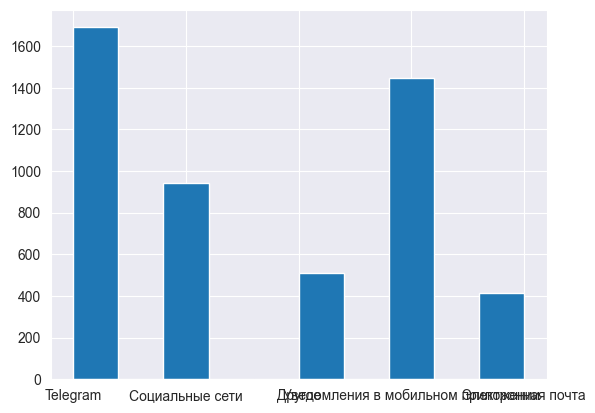

In [17]:
df['new_info_source'].hist()

In [18]:
df.rename(columns={'gamification':'отношение к геймификации','freq':'частота использования', 'top_func':'топ-функции', 'optional_func':'доп. функции', 'source':'откуда узнали', 'events':'мероприятия'},inplace=True)

In [19]:
df.columns

Index(['Unnamed: 0', 'частота использования', 'топ-функции', 'доп. функции',
       'откуда узнали', 'new_info_source', 'мероприятия',
       'отношение к геймификации', 'importance'],
      dtype='object')

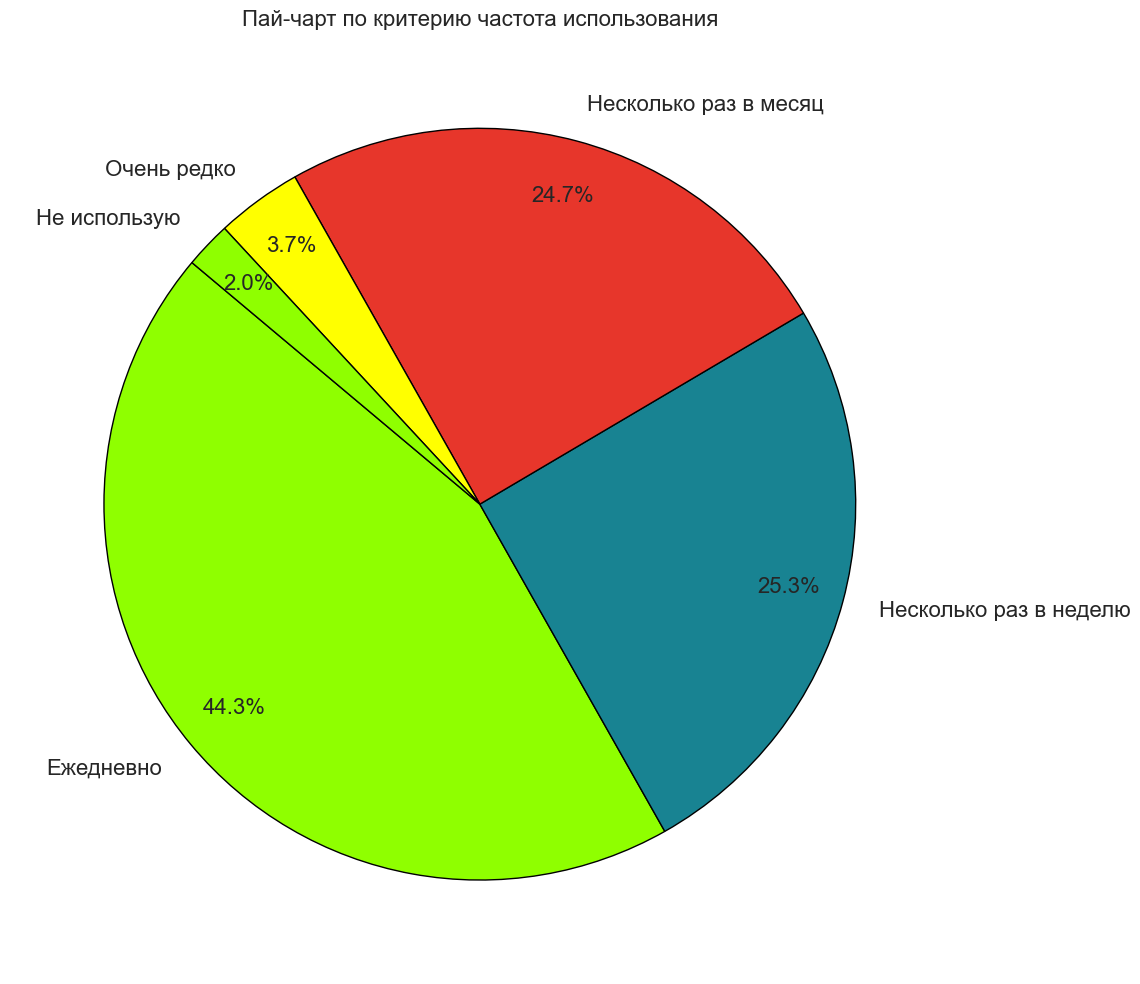

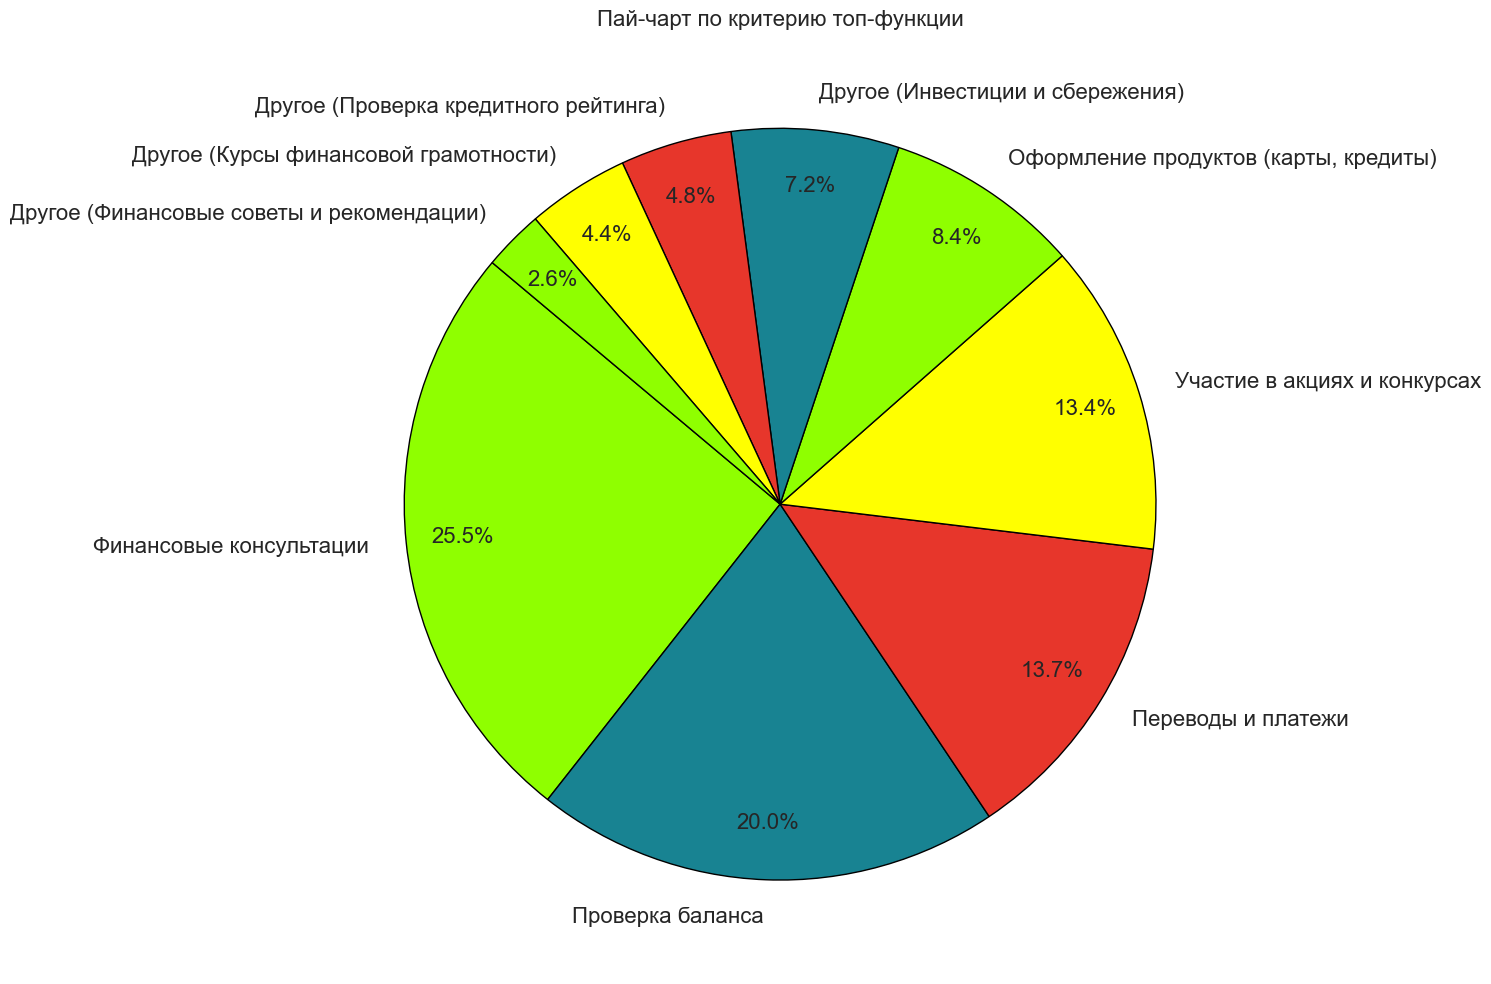

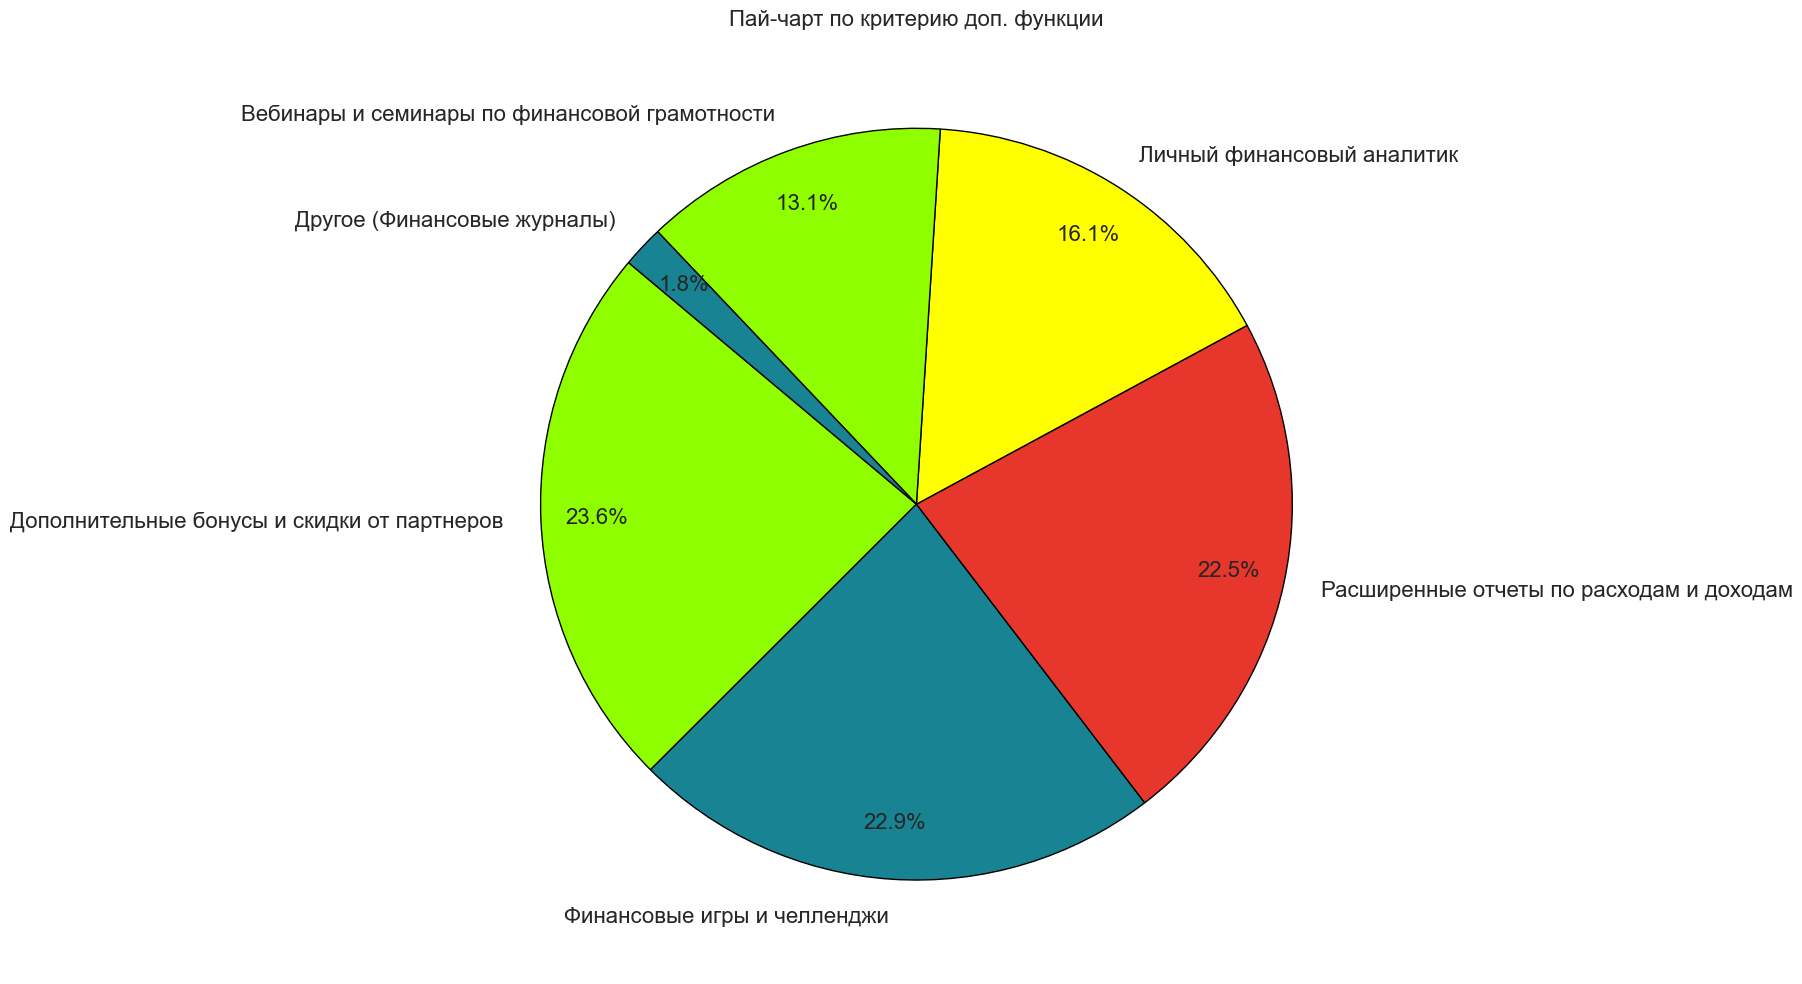

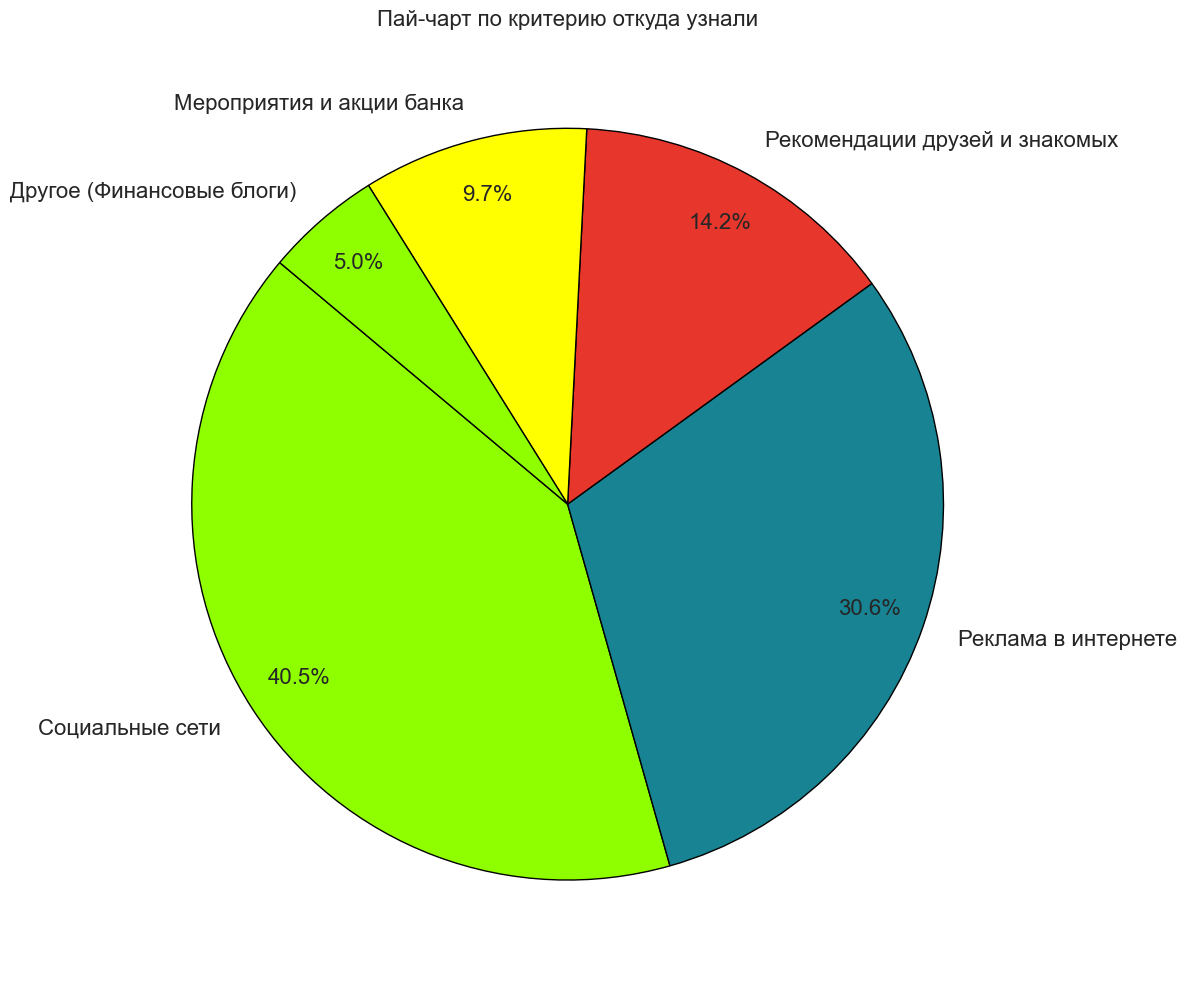

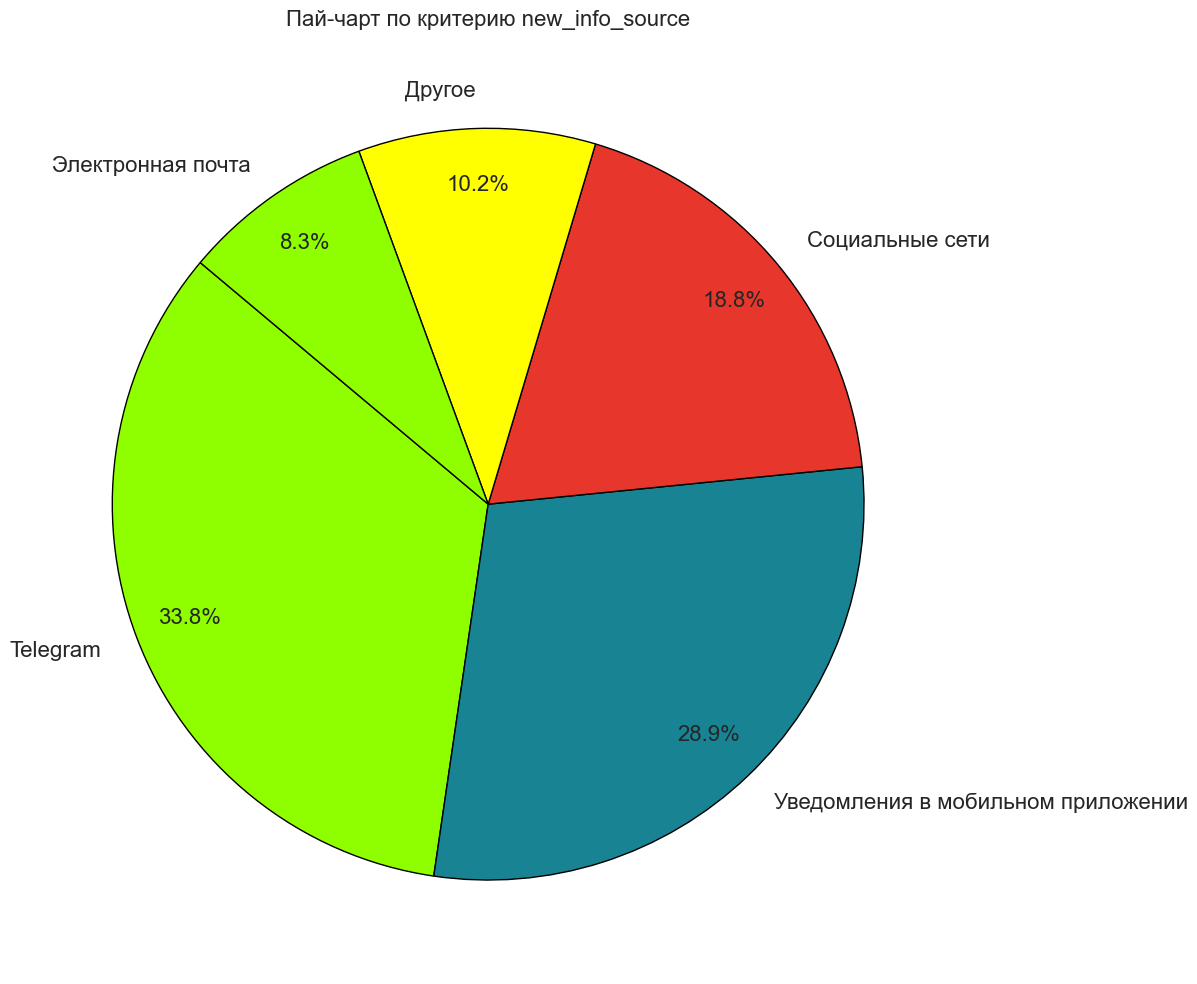

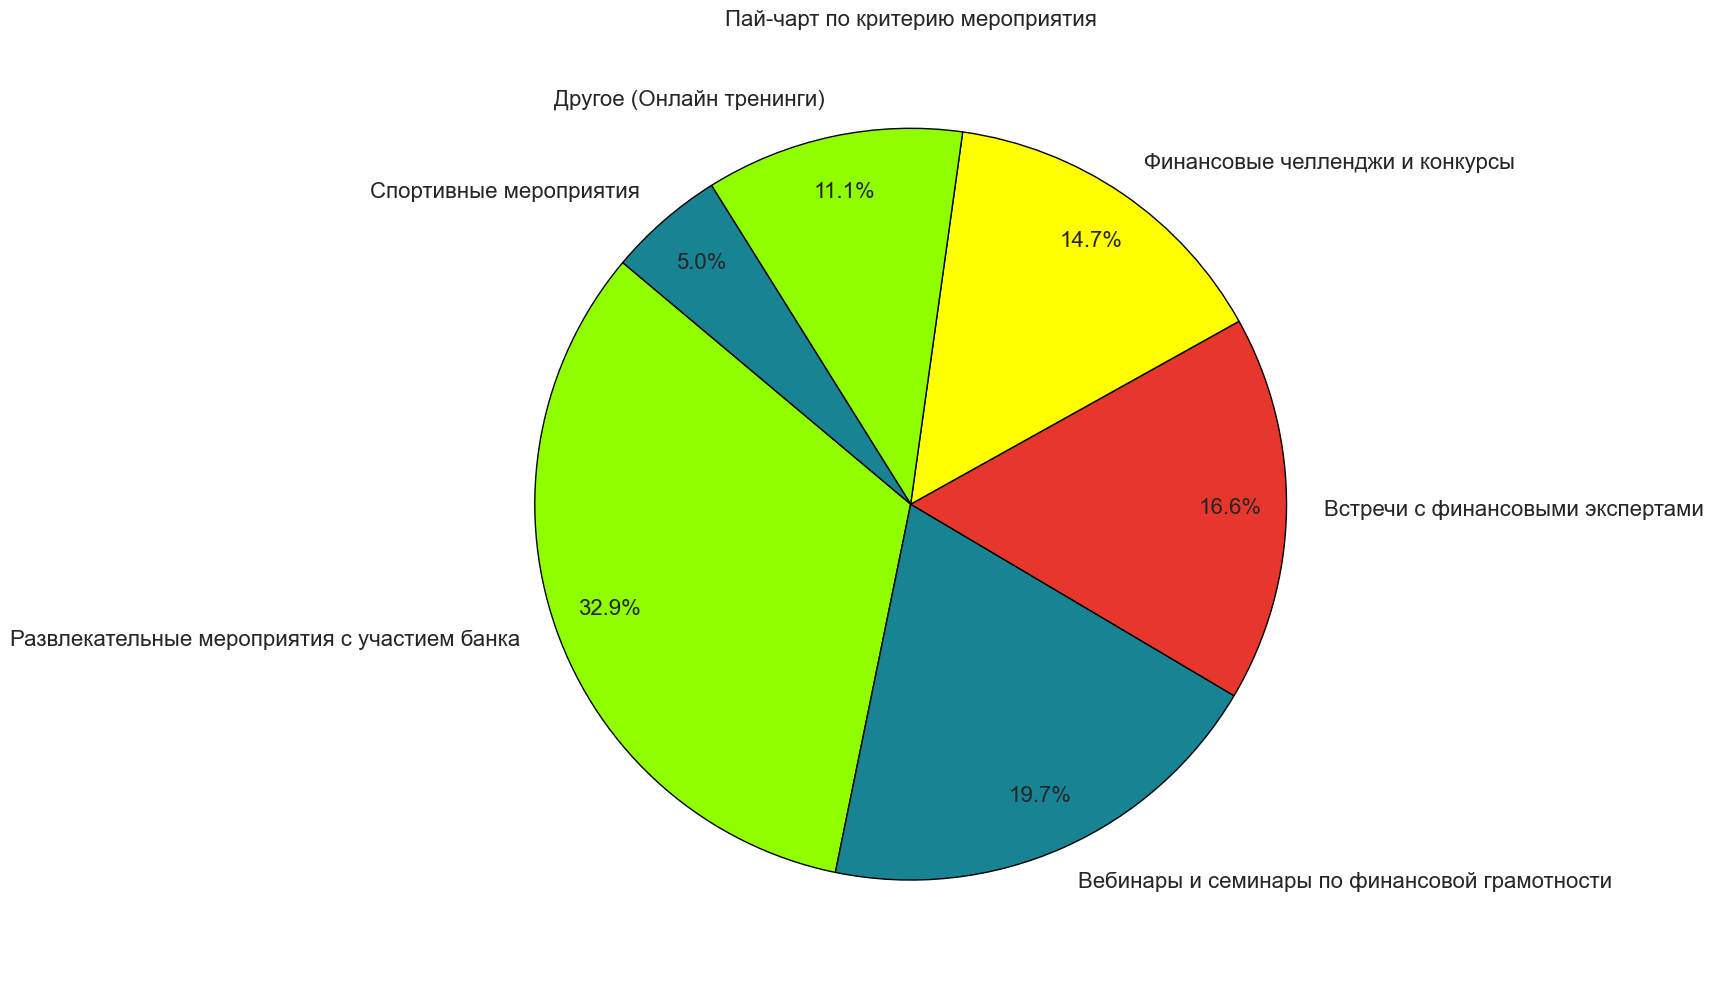

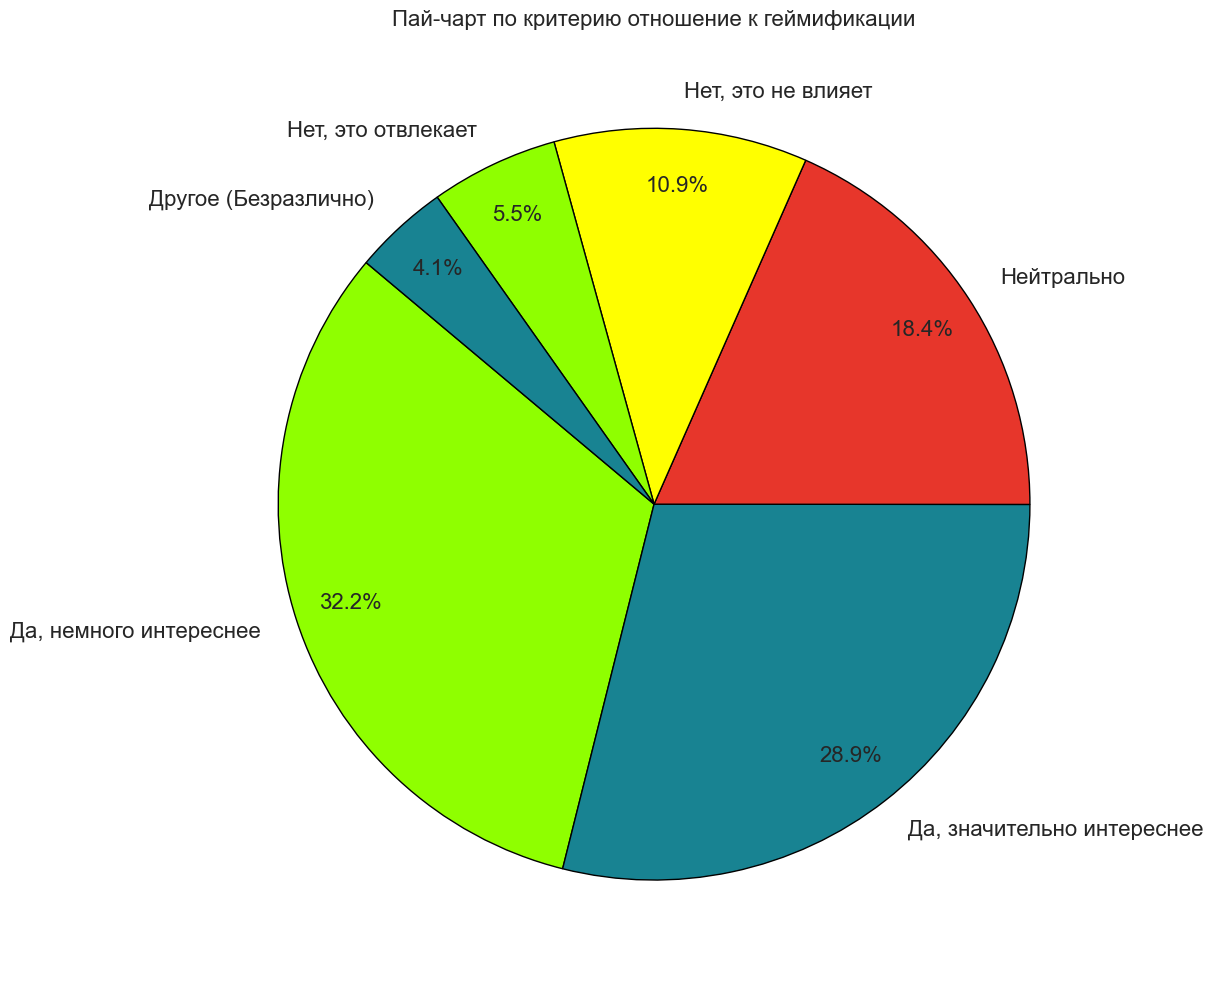

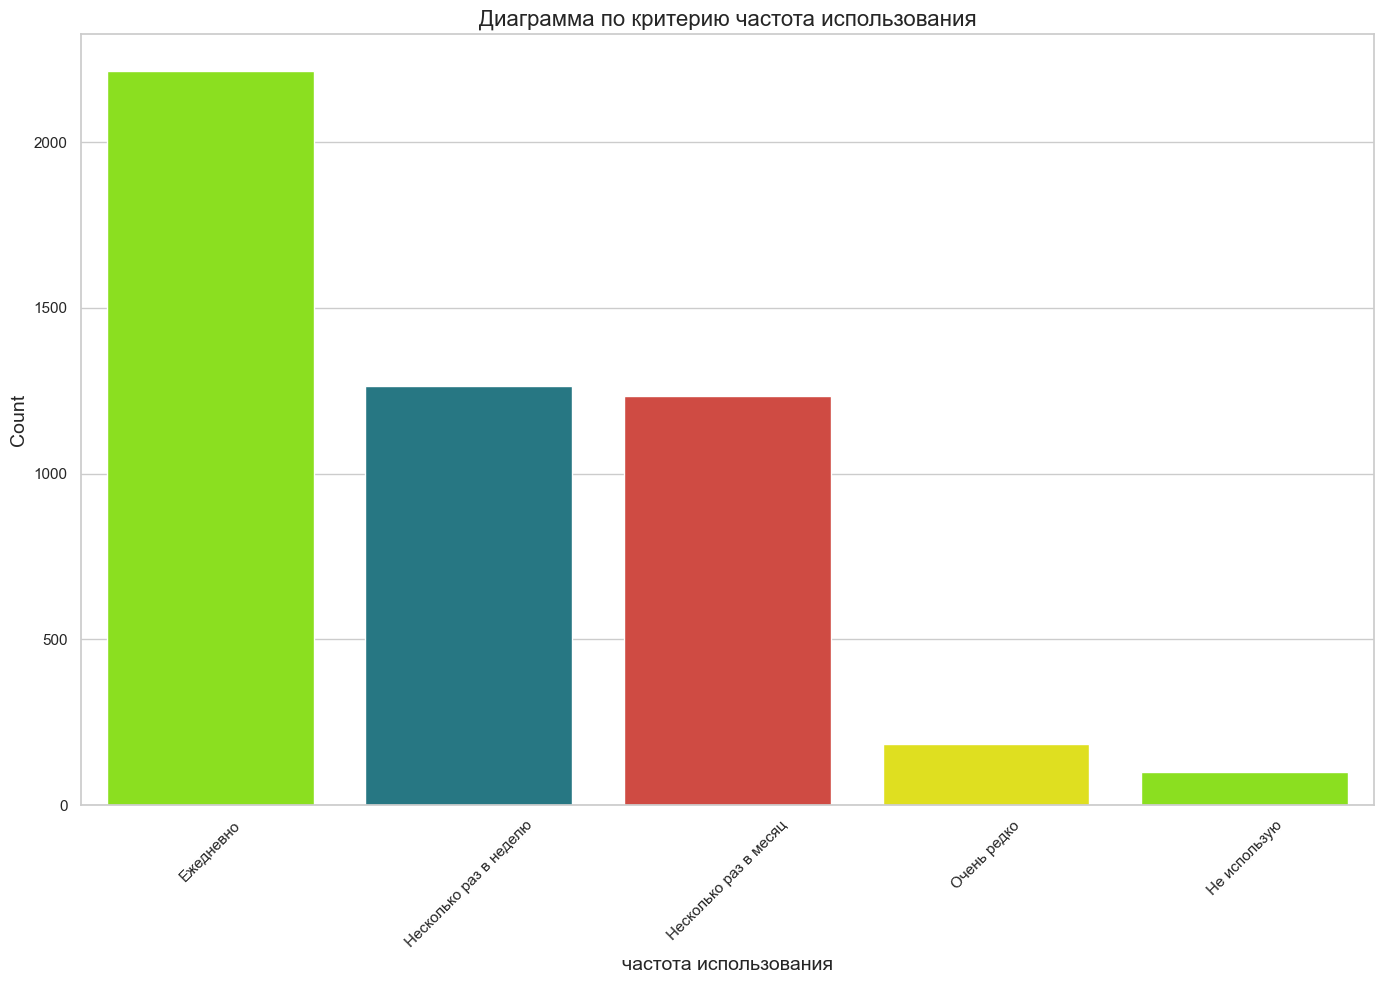

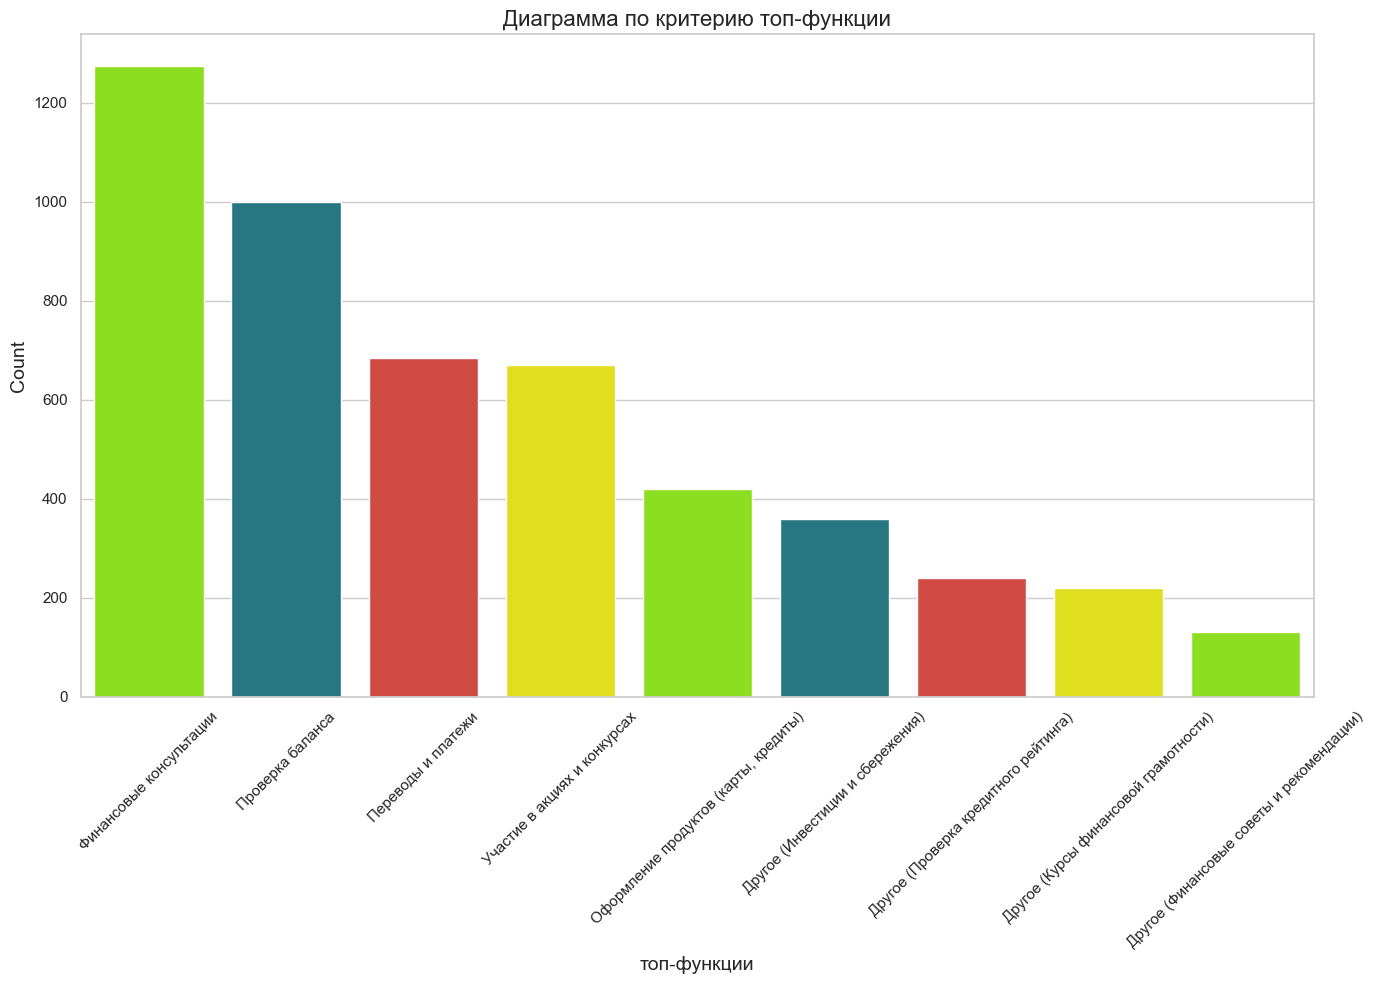

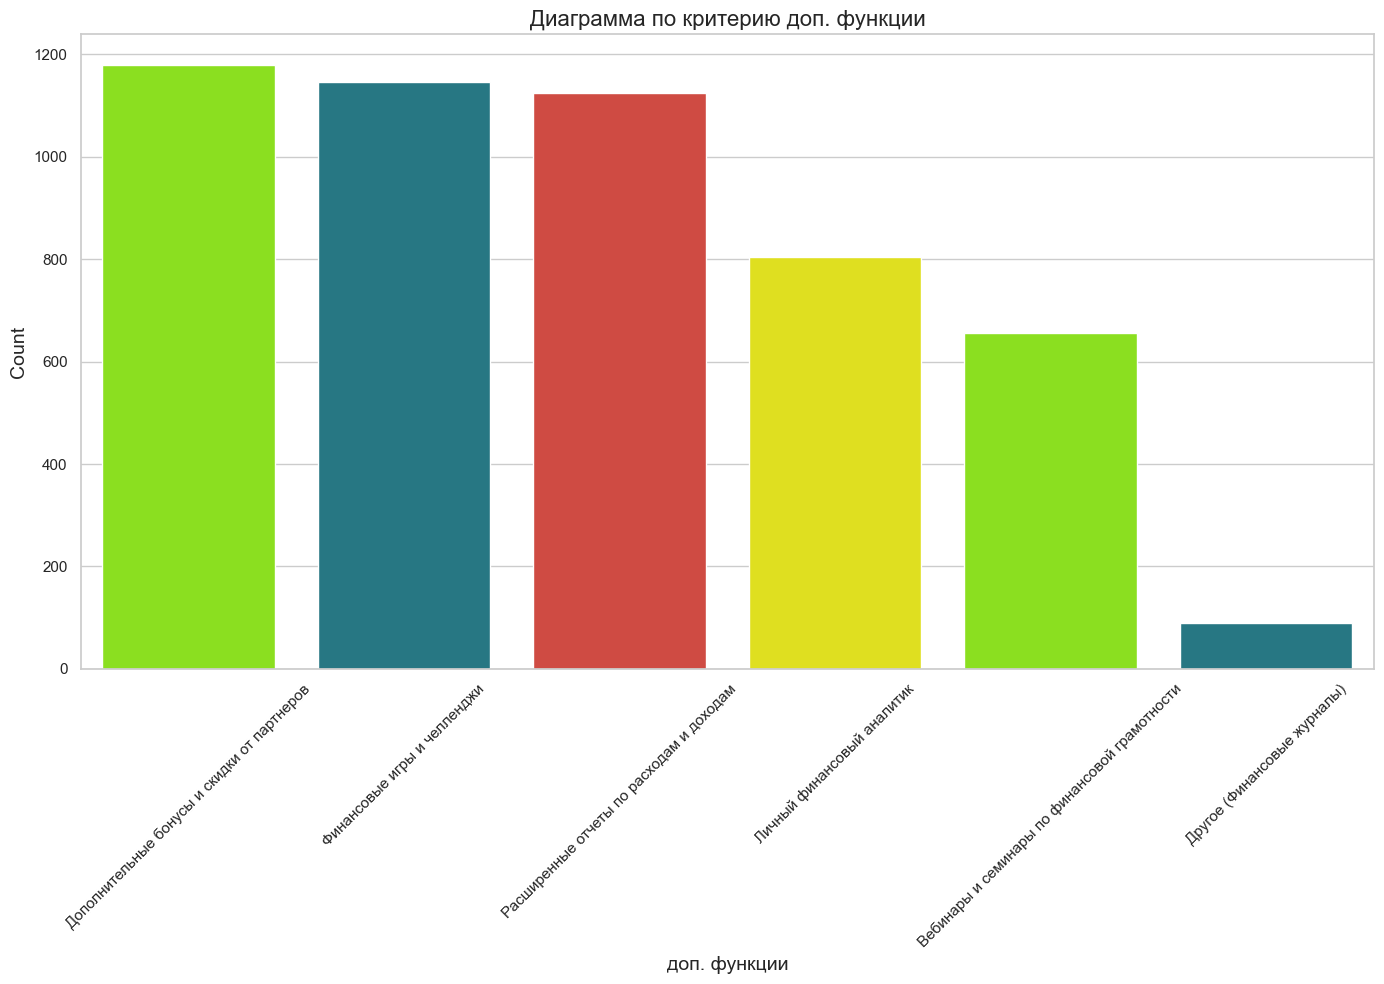

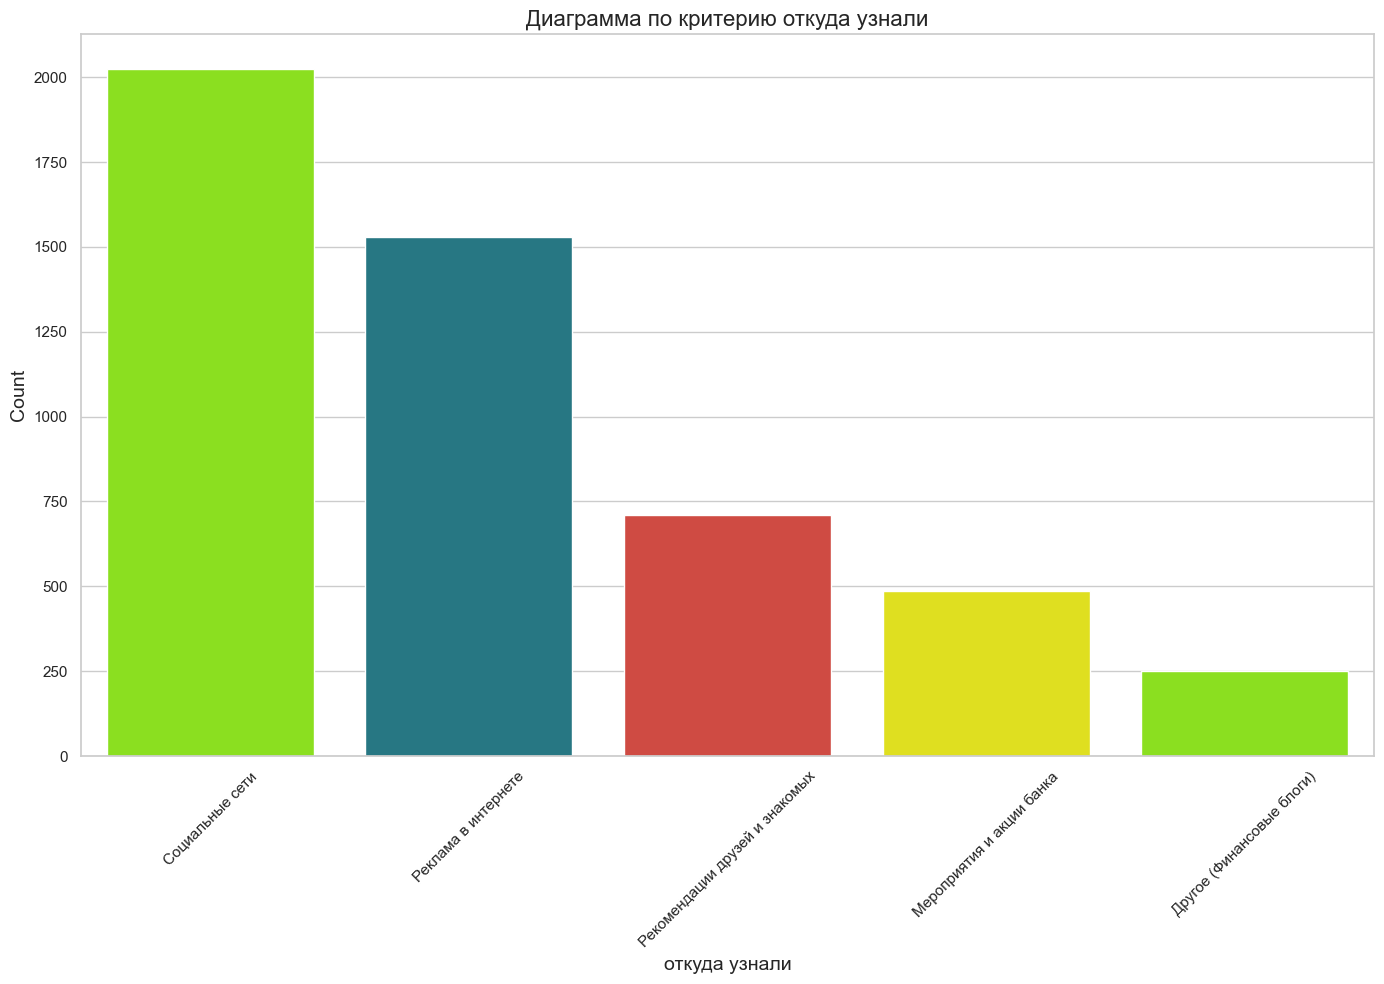

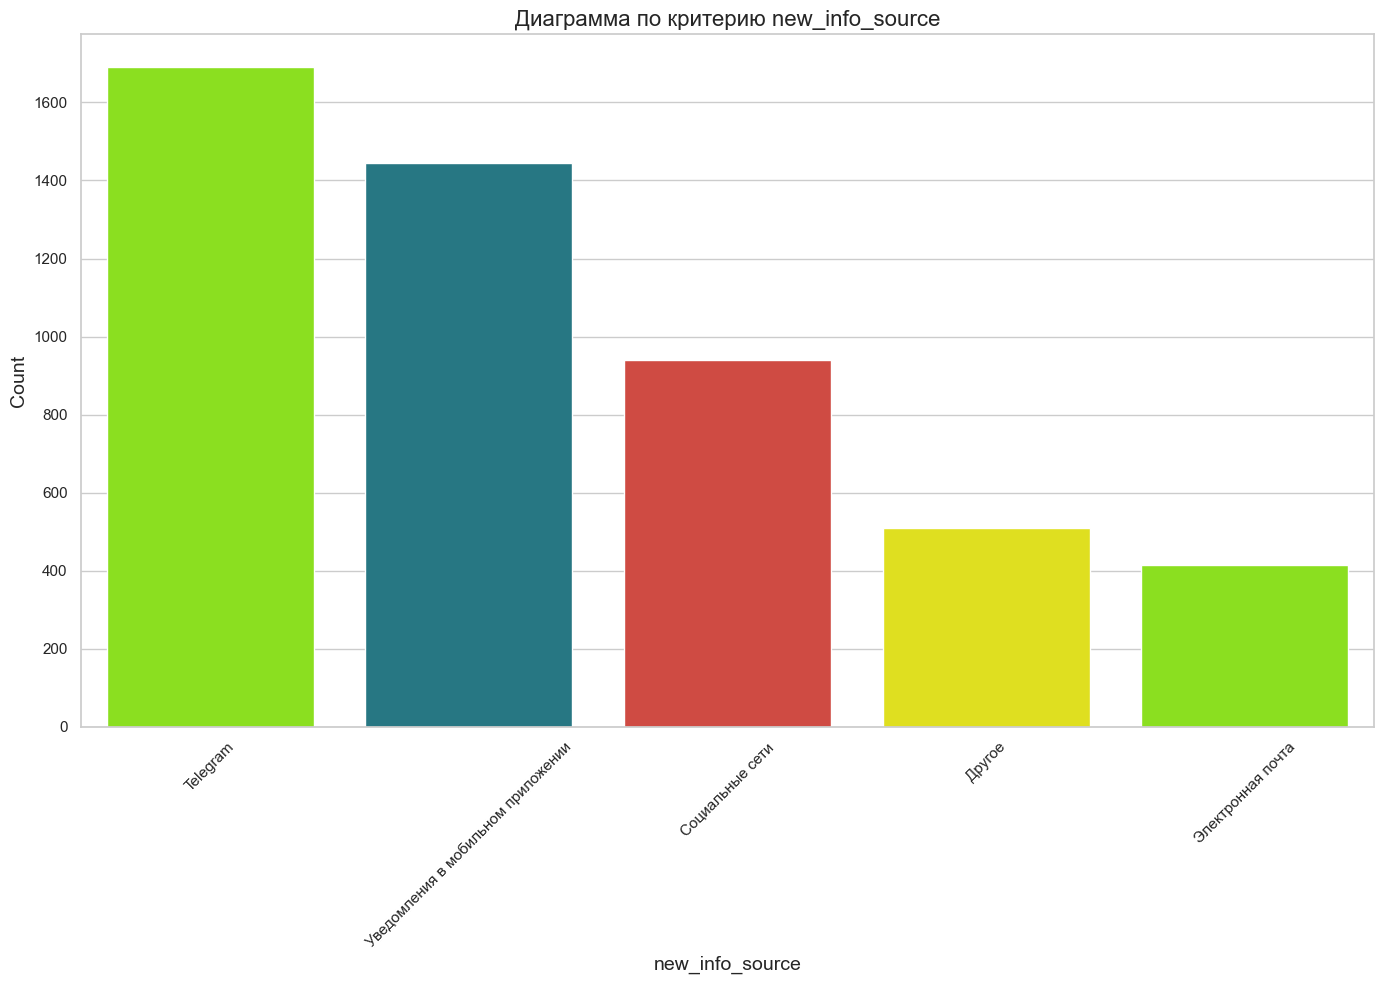

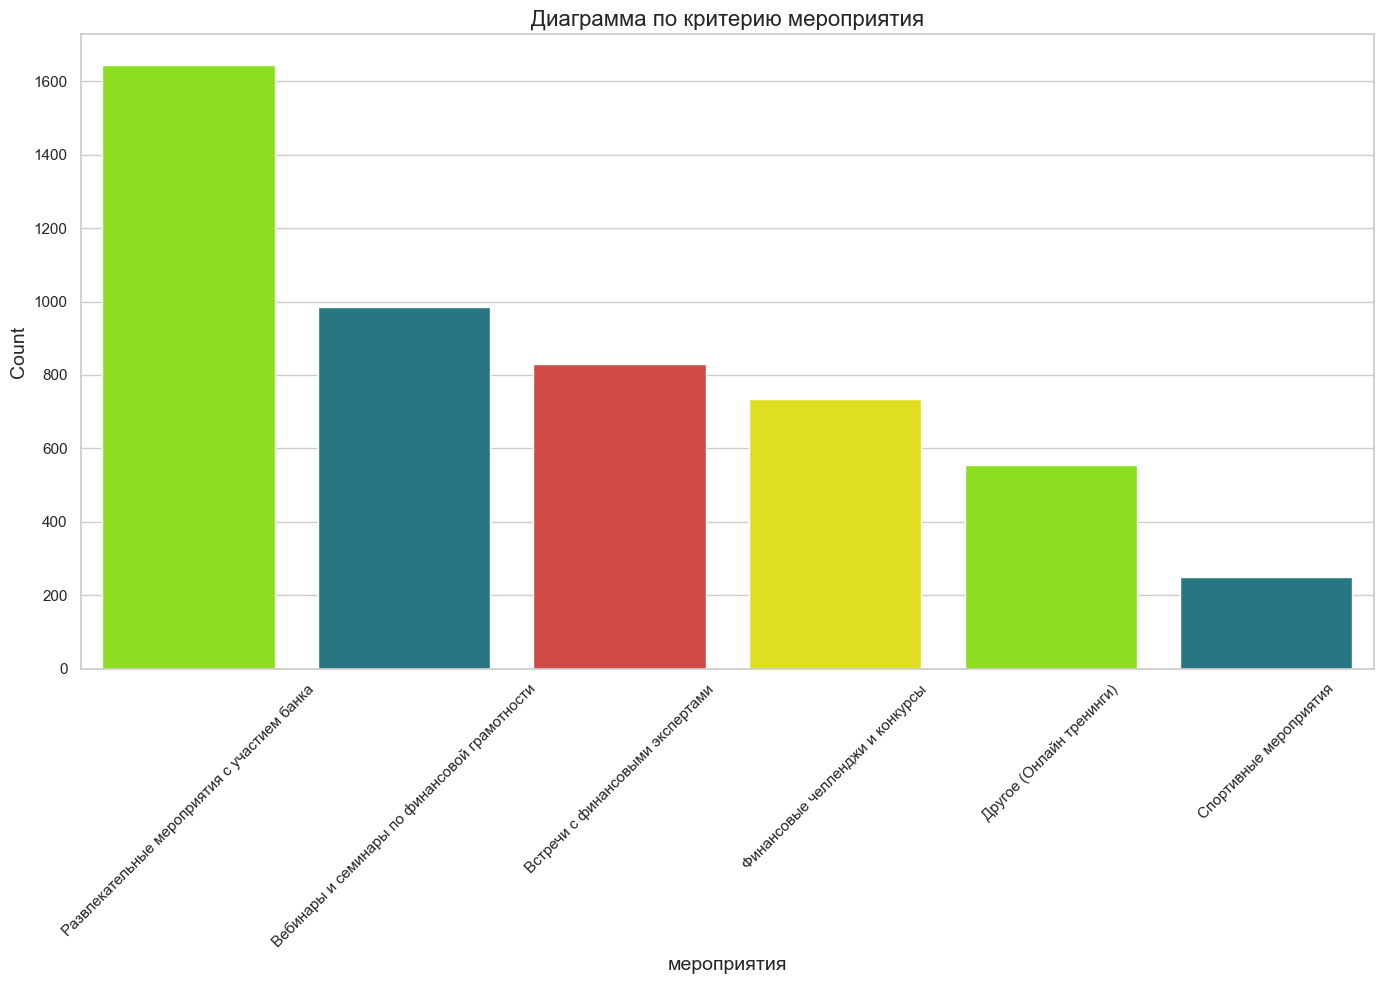

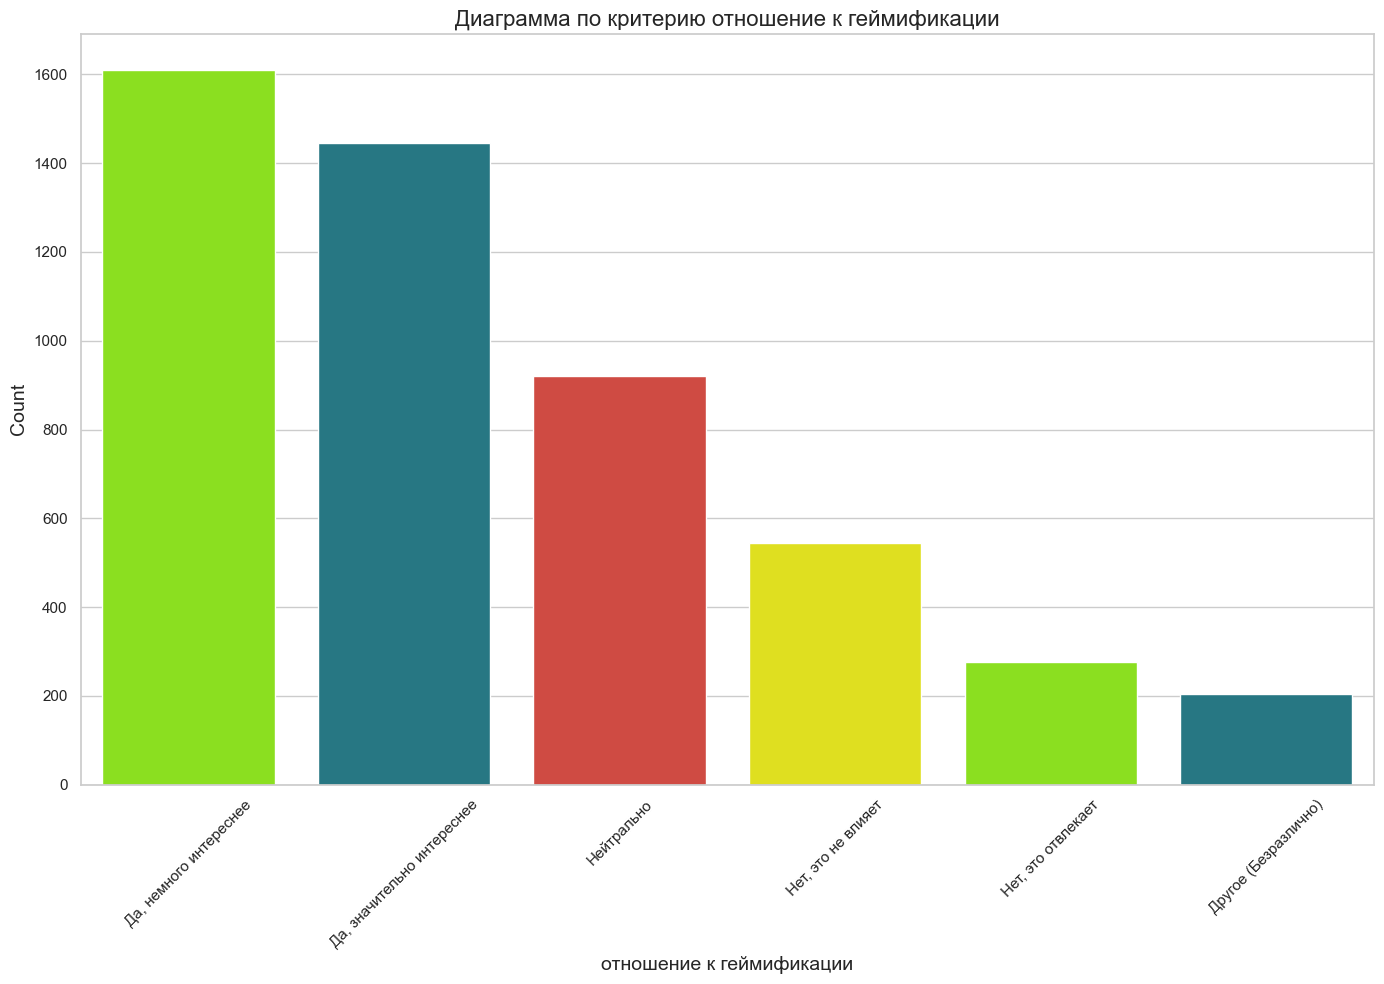

In [20]:
colors = ['#8FFF00', '#188392', '#E7362B', '#FFFF00']

# Устанавливаем стиль для seaborn
sns.set(style="whitegrid")

# Функция для построения pie и bar графиков для категориальных столбцов
def plot_categorical_columns(df):
    for column in df.select_dtypes(include=['object']).columns:
        # Считаем количество значений для каждой категории
        counts = df[column].value_counts()
        
        # Построение pie графика
        plt.figure(figsize=(22, 10))
        plt.pie(counts, labels=counts.index, colors=colors[:len(counts)], autopct='%1.1f%%', startangle=140, pctdistance=0.85, labeldistance=1.1, wedgeprops={'linewidth': 1.0, 'edgecolor': 'black'}, textprops={'fontsize': 16})
        plt.title(f'Пай-чарт по критерию {column}', fontsize=16)
        plt.tight_layout()
        
        # Сохранение pie графика
        plt.savefig(f'pie_chart_of_{column}.png')
        plt.show()
    
    for column in df.select_dtypes(include=['object']).columns:
        # Считаем количество значений для каждой категории
        counts = df[column].value_counts()
        
        # Построение bar графика
        plt.figure(figsize=(14, 10))
        sns.barplot(x=counts.index, y=counts.values, palette=colors[:len(counts)])
        plt.xticks(rotation=45)
        plt.title(f'Диаграмма по критерию {column}', fontsize=16)
        plt.xlabel(column, fontsize=14)
        plt.ylabel('Count', fontsize=14)
        
        plt.tight_layout()
        
        # Сохранение bar графика
        plt.savefig(f'bar_chart_of_{column}.png')
        plt.show()

# Вызов функции для построения графиков
plot_categorical_columns(df)